> `logit_model`에서 `MLE`를 산출하는 방법을 알아보자.

## 1. 데이터 불러오기

In [13]:
mroz <- load("./data/mroz.RData")

In [14]:
mroz

[1] "data" "desc" "self"

> `.RData` 포맷의 데이터를 불러오게 되면 이렇게 세 가지 변수가 들어오게 되는데 첫째는 데이터고, 둘째는 데이터에 대한 설명(description), 셋째는 파일 이름이 들어온다.

In [15]:
head(data)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,⋯,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,1,1610,1,0,32,12,3.3540,2.65,2708,34,⋯,16310,0.7215,12,7,5.0,0,14,10.910060,1.21015370,196
2,1,1656,0,2,30,12,1.3889,2.65,2310,30,⋯,21800,0.6615,7,7,11.0,1,5,19.499981,0.32851210,25
3,1,1980,1,3,35,12,4.5455,4.04,3072,40,⋯,21040,0.6915,12,7,5.0,0,15,12.039910,1.51413774,225
4,1,456,0,3,34,12,1.0965,3.25,1920,53,⋯,7300,0.7815,7,7,5.0,0,6,6.799996,0.09212332,36
5,1,1568,1,2,31,14,4.5918,3.60,2000,32,⋯,27300,0.6215,12,14,9.5,1,7,20.100058,1.52427220,49
6,1,2032,0,0,54,12,4.7421,4.70,1040,57,⋯,19495,0.6915,14,7,7.5,1,33,9.859054,1.55648005,1089


In [21]:
desc

variable,label
<fct>,<fct>
inlf,"=1 if in lab frce, 1975"
hours,"hours worked, 1975"
kidslt6,# kids < 6 years
kidsge6,# kids 6-18
age,woman's age in yrs
educ,years of schooling
wage,"est. wage from earn, hrs"
repwage,rep. wage at interview in 1976
hushrs,"hours worked by husband, 1975"


## 2. 분석

`data`에서 반응변수는 `inlf`, 이것은 노동력(lab force)에 속하는 지 여부를 나타낸다. 즉, `binary choice model`로 분석해야 하며 해당 분석에 필요한 몇 가지 함수들을 정의하고자 한다.

In [63]:
inlf <- data$inlf  ## y
kidslt6 <- data$kidslt6  ## x1
educ <- data$educ   ## x2

### **A. 로짓 함수**
---




`-` 반응변수가 범주형일 경우 선형 확률 모형으로 모형을 구축하는 것은 직관적으로 이해하기에 편리하지만, 추정한 확률값이 0과 1 사이를 벗어날 수도 있으며 논리적으로 불가능한 한계효과 값을 얻을 수 있다.

따라서 확률값을 나타낼 새로운 변환을 고려해야 하는데, 이것이 바로 로짓 모형이다.

In [22]:
G <- function(z) {
    exp(z)/(1+exp(z))
}

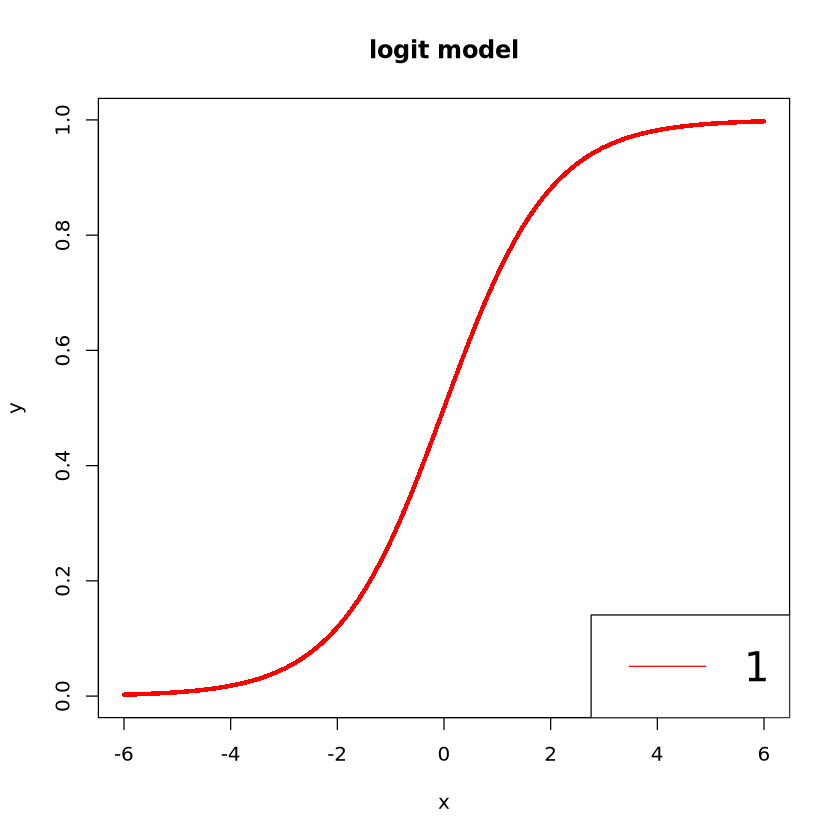

In [59]:
x <- seq(-6, 6, by = 0.01)
y <- G(x)

plot(y~x, pch = 16, cex = 0.5, col = 'red', main = 'logit model')
legend(x = 'bottomright', legend = c('1'), col = c('red'), lty = 1, cex = 2)

> 이런식으로 확률값이 0에서 1사이에 있게 만들 수 있다.

### **B. 가능도 함수**
---




`-` 로짓 모형을 확률값으로 두고, 베르누이 분포를 따르는 확률변수를 가져온다면 다음과 같이 가능도함수를 정의할 수 있다.

In [73]:
logit_mle <- function(theta_start) {
    X_beta <- theta_start[1] + theta_start[2]*kidslt6 + theta_start[3]*educ
    sum(-inlf*log(G(X_beta)) - (1-inlf)*log(1-G(X_beta)))
}

In [75]:
logit_mle(c(1.1,1.1,1.1))

[1] 4705.811

> 로그 가능도 함수에 음수를 취한 값이며, 변수인 `theta_start`는 초깃값으로 뉴턴랩슨 알고리즘을 돌리기 위해 지정한 것이다.

### **C. 최대가능도 추정량 산출**
---




`-` 뉴턴랩슨 방법은 특이한 방법으로 베타의 해가 되는 근삿값을 찾아준다. 이것을 사용하는 방식은 다음과 같다.

In [88]:
logit_out <- optim(theta_start <- c(1,1,1),  ## 시작 값을 넣어준다.
               method = 'BFGS',  ## BFGS라는 모형으로 적용할 거다
               logit_mle,  ## 해당 함수의 해의 근삿값을 찾을거다
               hessian = TRUE)  ## 헤시안 행렬을 따로 저장해둘 거다.

* 구해진 파라미터(근)을 알고 싶을 때

In [89]:
estimate <- logit_out$par
estimate

[1] -2.0541352 -1.0100856  0.2101881

* 헤시안 행렬(피셔의 정보 수)

In [91]:
information_m <- logit_out$hessian
information_m

167.87094,36.69709,2037.2549
36.69709,47.23865,478.3729
2037.25486,478.37292,25503.0566


* 분산과 표준오차

In [94]:
beta_var <- diag(solve(information_m))
se <- sqrt(beta_var)
se

[1] 0.44414790 0.16261317 0.03647958

* t값과 p-value

In [113]:
t <- estimate/se

In [123]:
p_value <- rep(1, 3)

for (i in c(1:3)) {
    if (t[i] > 0) {
        p_value[i] <- pnorm(t[i], lower.tail = FALSE)
    }
    else {
        p_value[i] <- pnorm(t[i])
    }
}

p_value

[1] 1.873987e-06 2.622627e-10 4.161026e-09

`-` 정리

In [124]:
beta <- c('beta0', 'beta1', 'beta2')
summary_info <- data.frame(beta, estimate, se, t, p_value)
summary_info

beta,estimate,se,t,p_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
beta0,-2.0541352,0.44414790,-4.624890,1.873987e-06
beta1,-1.0100856,0.16261317,-6.211586,2.622627e-10
beta2,0.2101881,0.03647958,5.761802,4.161026e-09


> 따라서 해당 값들은 모두 통계적으로 유의함을 알 수 있다.

## 3. 시각화

고졸자(교육연수 : 12년)와 대졸자(교육연수 : 16)년 간 노동 참여 가능성에 6세 미만 아동의 수가 미치는 영향을 비교해보자.

In [127]:
kidslt6_x <- seq(0, 7, by = 1)  ## or length = 8
kidslt6_x

[1] 0 1 2 3 4 5 6 7

In [130]:
y_collage_degree <- G(estimate[1] + estimate[2] * kidslt6_x + estimate[3] * 16)
y_highschool_degree <- G(estimate[1] + estimate[2] * kidslt6_x + estimate[3] * 12)  ## 연수가 12년

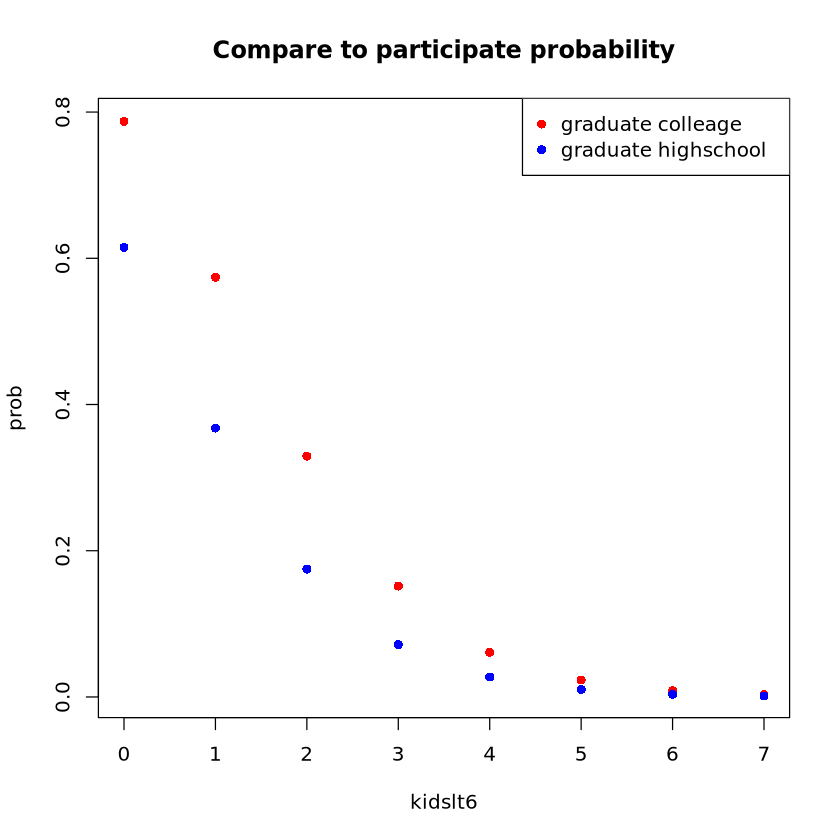

In [151]:
plot(kidslt6_x, y_collage_degree, pch = 16, col = 'red', cex = 1, main = paste('Compare to participate probability'), xlab = 'kidslt6', ylab = 'prob')
points(kidslt6_x, y_highschool_degree, pch = 16, col = 'blue', cex = 1)
legend(x = 'topright', legend = c('graduate colleage', 'graduate highschool'), col = c('red', 'blue'), pch = 16)

> 이렇게 간단한 시각화로 집단간 차이를 비교해볼 수 있다.